## Pertemuan 4



In [ ]:
import pandas as pd
import numpy as np
import sklearn
import yellowbrick

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


# Dataset

In [ ]:
#buuat data tabular seperti dibawah ini
df = pd.DataFrame({
    "ID buah": pd.Series([1,2,3,4,5]),
    "Diameter": pd.Series([7.0, 7.1, 6.5 ,6.6 ,6.8]),
    "Berat": pd.Series ([165,170,180,195,200])

})

In [ ]:
df

,ID buah,Diameter,Berat
0,1,7.0,165
1,2,7.1,170
2,3,6.5,180
3,4,6.6,195
4,5,6.8,200


# Algoritma K-Means

In [ ]:
# pemilihan feature
df_train = df.drop("ID buah",axis=1)
df_train

,Diameter,Berat
0,7.0,165
1,7.1,170
2,6.5,180
3,6.6,195
4,6.8,200


In [ ]:
# fitting / modeling berdasarkan jumlah kluster ( n=2 )
n=2
kmeans_model = KMeans(n_clusters=n, n_init=1,random_state=100).fit(df_train)

In [ ]:
# pelabelan cluster
df["Kluster"] = kmeans_model.labels_
df

,ID buah,Diameter,Berat,Kluster
0,1,7.0,165,0
1,2,7.1,170,0
2,3,6.5,180,2
3,4,6.6,195,1
4,5,6.8,200,1


In [ ]:
# hasil dari update
print(kmeans_model.cluster_centers_)

[[  7.05       167.5       ]
 [  6.63333333 191.66666667]]


## Tantangan dari algoritma K-Means
Limitasi atau tantangan dari algoritma k-means adalah menentukan nilai controid diawal kluster yang manual, sefingga perlu ada mekanisme/ metode tertentu untuk memilih controid diawal dan jumlah kluster

## Pemilihan controid awal
* menggunakan pengaturan parameter yang ada di sklearn
* lebuh lengkapnya bisa baca di dokumentasinya https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [ ]:
# n_cluster merupakan parameter dari jumlah cluster/kelompok yang harus ditempatkan
# nilai n_cluster tergantung data, atau bisa berdasarkan metode elbow, dll defaultnya 8 atau ketika tidak di isi jumlah kluster
# n_init merupakan parameter untuk menentukan berapa kali algoritma k-means dijalankan dengan controid seed yang berbeda
# nilai n_init bisa 1 atau lebih dari 1, defoultnya 10/auto
# random_state merupakan parameter untuk menentukan angka acak sebagai inisialisasi controid
# nilai random_state diisi dengan nilai deterministik(0-100), defaultnya None

# aturan parameter untuk kmeans_model_2 ini sehingga berbeda dengan parameter kmeans_model sebelumnya
kmeans_model_2 = KMeans(n_clusters=2, n_init="auto").fit(df_train)
df2 = df.copy()
df2["kluster"] = kmeans_model_2.labels_
df2

,ID buah,Diameter,Berat,Kluster,kluster
0,1,7.0,165,0,1
1,2,7.1,170,0,1
2,3,6.5,180,2,1
3,4,6.6,195,1,0
4,5,6.8,200,1,0


Lihat hasil labeling cluster berbeda ketika parameter berbeda

# Pemilihan jumlah kluster
* menggunakan metide elbow
* Library nya bisa apa saja, contoh disini menggunakan library scikit yellowbrick cluster

In [ ]:
# standarisasi terlebih dahulu dalam bentuk array
x_array = np.array(df_train)
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
print(x_scaled)

[[0.83333333 0.        ]
 [1.         0.14285714]
 [0.         0.42857143]
 [0.16666667 0.85714286]
 [0.5        1.        ]]


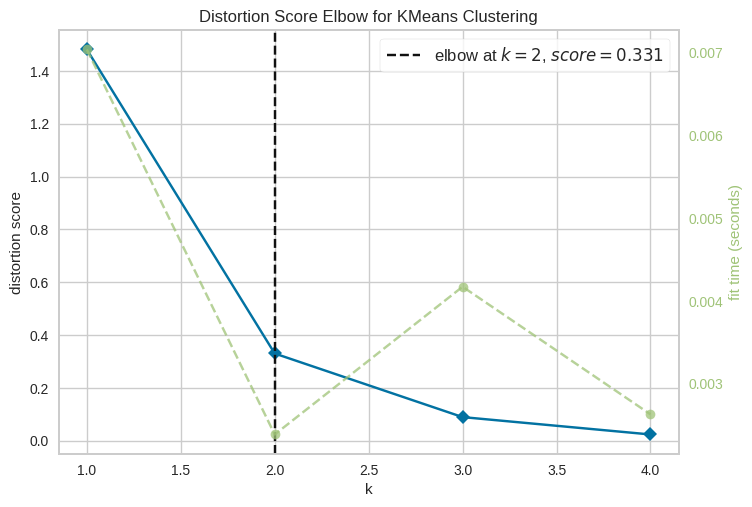

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
km = KMeans(n_init=1,random_state=100)
visualizer = KElbowVisualizer(km, k = (1,5),timings=True)
visualizer.fit(x_scaled)
visualizer.show()

Lihat hasil menunjukan k=2, artinya nilai 2 disini bisa dijadikan acuan untuk jumlah kluster

## Tugas

In [ ]:
df_tugas = pd.read_csv("https://raw.githubusercontent.com/rahmantaufik27/dataset/main/study/student_score_pass.csv")

df_tugas = df_tugas.dropna()
df_tugas

,npm,activeness_score,assignment_score,pre_test_score,post_test_score,midterm_test_score,end_semester_test_score,pass_test
0,2022041101,99,71.0,93.0,52.0,44.0,24,not pass
2,2022041103,86,71.0,84.0,17.0,21.0,41,not pass
4,2022041105,93,85.0,68.0,29.0,44.0,50,not pass
5,2022041106,85,95.0,34.0,73.0,57.0,98,not pass
6,2022041107,95,79.0,52.0,54.0,85.0,13,not pass
...,...,...,...,...,...,...,...,...
366,2022041467,88,75.0,80.0,11.0,55.0,82,not pass
368,2022041469,96,87.0,55.0,56.0,95.0,11,pass
369,2022041470,569,83.0,89.0,15.0,86.0,13,not pass
370,2022041471,84,92.0,87.0,97.0,42.0,27,pass


,npm,activeness_score,assignment_score,pre_test_score,post_test_score,midterm_test_score,end_semester_test_score,pass_test,kluster
0,2022041101,99,71.0,93.0,52.0,44.0,24,not pass,2
2,2022041103,86,71.0,84.0,17.0,21.0,41,not pass,2
4,2022041105,93,85.0,68.0,29.0,44.0,50,not pass,2
5,2022041106,85,95.0,34.0,73.0,57.0,98,not pass,1
6,2022041107,95,79.0,52.0,54.0,85.0,13,not pass,2
...,...,...,...,...,...,...,...,...,...
366,2022041467,88,75.0,80.0,11.0,55.0,82,not pass,1
368,2022041469,96,87.0,55.0,56.0,95.0,11,pass,2
369,2022041470,569,83.0,89.0,15.0,86.0,13,not pass,3
370,2022041471,84,92.0,87.0,97.0,42.0,27,pass,0


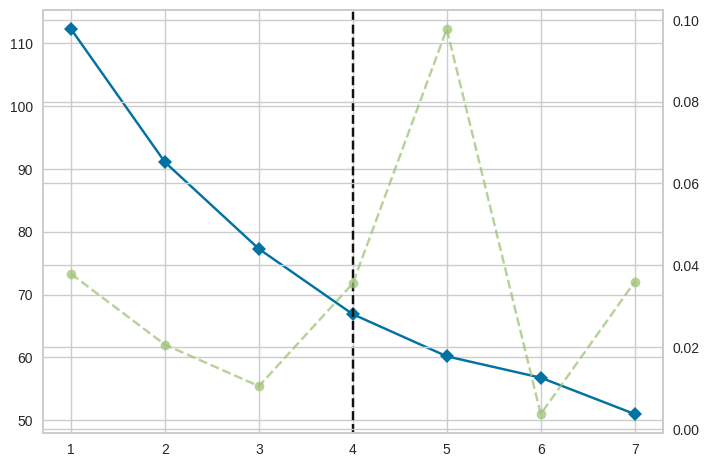

In [ ]:
df_tugas_train = df_tugas.drop("pass_test",axis=1)
df_tugas_train = df_tugas_train.drop("npm",axis=1)
x_array2 =np.array(df_tugas_train)
scaler2 =MinMaxScaler()
x_scaled2 = scaler2.fit_transform(x_array2)

km = KMeans(n_init=1, random_state=100)
em = KElbowVisualizer(km, k=(1,8),timings=True)
em.fit(x_scaled2)

nc = em.elbow_value_
kmm = KMeans(n_clusters=nc, n_init=1,random_state=100).fit(df_tugas_train)
df_tugas["kluster"]=kmm.labels_
df_tugas


In [ ]:
print("Jumlah data: ", len(df_tugas))
print("jumlah Kluster: ", nc)
print("Jumlah data kluster 0: ",len(df_tugas[df_tugas["kluster"]==0]))
print("Jumlah data kluster 1: ",len(df_tugas[df_tugas["kluster"]==1]))
print("Jumlah data kluster 2: ",len(df_tugas[df_tugas["kluster"]==2]))
print("Jumlah data kluster 3: ",len(df_tugas[df_tugas["kluster"]==3]))

Jumlah data:  312
jumlah Kluster:  4
Jumlah data kluster 0:  65
Jumlah data kluster 1:  137
Jumlah data kluster 2:  108
Jumlah data kluster 3:  2
